# Proyect 1 - Food sales predictions

## Parte 1

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [290]:
df = pd.read_csv("/Users/jpyolito/Desktop/Coding_Dojo/Proyect1/foodsales_predictions.csv")
df.head(10) # Veamos la cabezera 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


## Parte 2

* Sus datos ya deberían estar cargados en el cuaderno de la parte 1 del proyecto.

* Exploren los datos - ¿Qué necesitan para limpiar estos datos? ¡Límpienlos!  

* Asegúrense de abordar cada una de las siguientes tareas:

1) ¿Cuántas filas y columnas?

2) ¿Cuáles son los tipos de datos en cada variable?

3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

4) Identifiquen los valores faltantes.

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

6) Confirmen que no hay valores faltantes después de abordarlos.

7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

1. ¿Cuántas filas y columnas?

In [291]:
# numero de filas y columnas
df.shape # (filas, columnas)

(8523, 12)

2. ¿Cuáles son los tipos de datos en cada variable?

In [292]:
#Alternativa 1: .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [293]:
#Alternativa 2: .dtypes
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3. ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [294]:
# Veamos si existen filas duplicadas
df.duplicated().value_counts() # No hay!

False    8523
dtype: int64

4. Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [295]:
# Veamos variable por variable si hay alguna categoría inconsistente
def contador_valores(columna):
    return df[columna].value_counts()

for variable in df:
    print(variable, ":")
    print(contador_valores(variable))
    print ("-"*60)
# Al ver el output de todas las variables en "text editor", podemos ver que sólo la variable "Item_Fat_Content" tiene inconsistencia, ¡HAGAMOS ALGO AL RESPECTO!

Item_Identifier :
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
------------------------------------------------------------
Item_Weight :
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64
------------------------------------------------------------
Item_Fat_Content :
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
------------------------------------------------------------
Item_Visibility :
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
-----------------------------------

In [296]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"LF":"Low Fat", "reg" : "Regular" , "low fat" : "Low Fat"})

In [297]:
# Veamos el cambio
contador_valores("Item_Fat_Content")

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

5. Identifiquen los valores faltantes.

In [298]:
# al ver la información del punto 3 (.info()), podemos ver que hay 2 variables con info faltante:
df.isnull().sum() # Claramente hay 2variables con datos faltantes "(Item_Weight" y "Outlet_Size")

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

6. Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [299]:
# Vemos que la cantidad de datos nulos por columna no es menor, POR LO QUE NO SE ELIMINARAN FILAS
# También, podemos notar que todas las variables tienen mas del 50% con datos, POR LO TANTO NO SE ELIMINARÁN COLUMNAS

# Nuestra única alternativa es reemplazar los datos faltantes, ¿pero cómo?
# Partamos viendo algun patron con respecto a la variable "Item Weight" con respecto al número de identificación

In [300]:
df.groupby("Item_Identifier")[["Item_Weight"]].value_counts() # a simple vista se ve que cada identificador 
# tiene solo 1 valor de la variable peso. Veamos si efectivamente todos son así

Item_Identifier  Item_Weight
DRA12            11.600         6
DRA24            19.350         5
DRA59            8.270          6
DRB01            7.390          2
DRB13            6.115          5
                               ..
NCZ30            6.590          6
NCZ41            19.850         5
NCZ42            10.500         5
NCZ53            9.600          4
NCZ54            14.650         5
Length: 1555, dtype: int64

In [301]:
lista_tuplas = df.groupby("Item_Identifier")[["Item_Weight"]].value_counts().index # guardemos los valores 
# únicos de la variable "Item_Identifier" con su respectivos valores según la varaible "Item_Weight"
suma_valorUnico = 0
suma_NoVU = 0

for tupla in lista_tuplas:
    if len(tupla) == 2:
        suma_valorUnico +=1
    elif len(tupla) > 2:
        suma_NoVU+=1


print("Hay",suma_valorUnico, "identificadores con valores únicos")
print("Hay", suma_NoVU, "identificadores con más de un valor único")
# podemos ver que practicamente todos los valores de la variable "Item_Identifier" tienen un valor único
# en la variable "Item_Weight" ==>  PATRÓN ENCONTRADO


Hay 1555 identificadores con valores únicos
Hay 0 identificadores con más de un valor único


In [302]:
for tupla in lista_tuplas:
    identificador = tupla[0]# filtremos según el identificador
    valor_unico = tupla[1]# guardemos el valor único del identificador en cuestión
    filtro = df["Item_Identifier"] == identificador # filtremos según el identificador
    df.loc[filtro,"Item_Weight"] = df.loc[filtro,"Item_Weight"].fillna(valor_unico) # a partir del filtro, rellenemos
    # los datos NaN por el valor único
    
    
    


In [303]:
# Veamos los datos nulos actualizados (CORRA EL CÓDIGO ANTES DE SEGUIR LEYENDO ESTA CELDA)
df.isnull().sum() # Podemos ver que aun hay 4 valores nulos.
# Al indagar en el groupby de más mas arriba, podemos ver que hay 4 identificadores (FDK57, FDN52, FDE52 Y FDQ60)
# sin ningun tipo de valor en "Item_Weight". Por lo tanto, dado que a 4 filas de dicha columna le faltan datos, cuyos
# identificadores son distintos en cada uno, se procederá a eliminar dichas filas

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [304]:
#Eliminación de dichas 4 filas
df.dropna(subset=['Item_Weight'], inplace=True) # OJO que las filas eliminadas tenian datos en "Outlet_Size"
# debido a que su valor de datos nulos no bajó (costos de eliminar filas)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [305]:
# Veamos ahora la variable "Outlet_Size"
# Investiguemos si hay un patrón con alguna variable

lista_tuplas2 = df.groupby("Outlet_Identifier")[["Outlet_Size"]].value_counts().index # También se puede ver que existe un patrón
# del valor del Outlet_Size acorde al valor de la variable Outlet_identifier
lista_tuplas2 # Se ve que hay patrón, pero faltan identificadores que son los que tienen datos faltantes No nos sirve :(
# Veamos las otras variables

MultiIndex([('OUT013',   'High'),
            ('OUT018', 'Medium'),
            ('OUT019',  'Small'),
            ('OUT027', 'Medium'),
            ('OUT035',  'Small'),
            ('OUT046',  'Small'),
            ('OUT049', 'Medium')],
           names=['Outlet_Identifier', 'Outlet_Size'])

In [306]:
df.groupby('Outlet_Location_Type')[["Outlet_Size"]].value_counts() # Al parecer Tier 2 solo tiene 1 valor y muchas repeticiones.
# Investiguemos!!!


Outlet_Location_Type  Outlet_Size
Tier 1                Small          1457
                      Medium          930
Tier 2                Small           930
Tier 3                Medium         1860
                      High            932
dtype: int64

In [307]:
print(df[df["Outlet_Location_Type"] == "Tier 2"]["Outlet_Size"]) #podemos ver que Tier 2 tiene valores faltantes y un
# valor único, ¿Podría ser este un patrón para algunos datos NaN?

#Problema: vemos que aproximadamente el 33,4% de los datos estan rellenados, veamos otras variables
df[df["Outlet_Location_Type"] == "Tier 2"]["Outlet_Size"].count() / df[df["Outlet_Location_Type"] == "Tier 2"].shape[0]

8         NaN
9         NaN
19      Small
22      Small
25        NaN
        ...  
8510    Small
8513    Small
8514      NaN
8519      NaN
8520    Small
Name: Outlet_Size, Length: 2785, dtype: object


0.3339317773788151

In [308]:
df.groupby('Outlet_Type')[["Outlet_Size"]].value_counts() # Encontramos valores únicos de la variable "Outlet_Type"

Outlet_Type        Outlet_Size
Grocery Store      Small           527
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          932
dtype: int64

In [309]:
print(df[df["Outlet_Type"] == "Grocery Store"]["Outlet_Size"].value_counts())# Otro patrón encontrado
print(df[df["Outlet_Type"] == "Grocery Store"]["Outlet_Size"]) # Grocery Store tiene datos NaN en Outlet_Type

# aca vemos un mayor porcentaje de datos no nulos que Tier 2: 48.7% aprox
df[df["Outlet_Type"] == "Grocery Store"]["Outlet_Size"].value_counts()/len(df[df["Outlet_Type"] == "Grocery Store"]["Outlet_Size"])

Small    527
Name: Outlet_Size, dtype: int64
3         NaN
23      Small
28        NaN
29      Small
30        NaN
        ...  
8473      NaN
8480    Small
8486      NaN
8490    Small
8509      NaN
Name: Outlet_Size, Length: 1082, dtype: object


Small    0.487061
Name: Outlet_Size, dtype: float64

In [310]:
# los otros valores con datos únicos de "Outlet_Type" no tienen datos faltantes
print(df[df["Outlet_Type"] == "Supermarket Type2"]["Outlet_Size"].isna().sum())
print(df[df["Outlet_Type"] == "Supermarket Type3"]["Outlet_Size"].isna().sum())

0
0


In [311]:
# rellenemos acorde a Tier 2 y a Grocery Store

# Grocery Store:
relleno1 = df[df["Outlet_Type"] == "Grocery Store"]["Outlet_Size"].value_counts().index[0] #valor "Small"
filtro1 = df.loc[df["Outlet_Type"] == "Grocery Store"] # filtramos acrode a Grocery Store
filtro1["Outlet_Size"].fillna(relleno1 , inplace = True) # rellenamos datos nulos a la base filtrada
df.update(filtro1)

# Tier 2
relleno2 = df[df["Outlet_Location_Type"] == "Tier 2"]["Outlet_Size"].value_counts().index[0]#valor "Small"
filtro2 = df.loc[df["Outlet_Location_Type"] == "Tier 2"]# filtramos acrode a Tier 2
filtro2["Outlet_Size"].fillna(relleno2 , inplace = True) # rellenamos datos nulos a la base filtrada
df.update(filtro2)


/var/folders/kj/npnp2hyx5mv_ccn5jlth23tr0000gn/T/ipykernel_34836/2985103735.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro1["Outlet_Size"].fillna(relleno1 , inplace = True) # rellenamos datos nulos a la base filtrada
/var/folders/kj/npnp2hyx5mv_ccn5jlth23tr0000gn/T/ipykernel_34836/2985103735.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro2["Outlet_Size"].fillna(relleno2 , inplace = True) # rellenamos datos nulos a la base filtrada


In [312]:
# COMO SABER QUE RELLENAMOS BIEN LA VARIABLE "Outlet_Size"???

# Al inicio, podemos notar que hay 2410 datos nulos en la variable "Outlet_Size"

#Al filtrar la variable "Outlet_Location_Type" a partir del valor Tier 2, nos aparece que hay 2785 filas 
df.loc[df["Outlet_Location_Type"] == "Tier 2"].shape[0] # muestra 2785 filas

# De las 2785 filas, al utilizar .value_counts() en la variable "Outlet Size", podemos notar que hay 930
# valores "Small", significando que hay 1855 datos nulos (2785 - 930)
df.loc[df["Outlet_Location_Type"] == "Tier 2"]["Outlet_Size"].value_counts() # muestra 930 datos "Small"

#Realizamos el mismo procedimiento para la variable "Outlet_Type" == "Grocery Store"
df.loc[df["Outlet_Type"] == "Grocery Store"].shape[0] # muestra 1082 filas

df.loc[df["Outlet_Type"] == "Grocery Store"]["Outlet_Size"].value_counts() # muestra 527 datos "Small"
# aplicando la resta 1082 - 527 = 555 datos nulos

# Si sumamos las cantidades de datos nulos de Grocery store y Tier 2 tenemos: 555 + 1855 = 2410 (cantidad de datos
# nulos totales de la variable "Outlet_Size") *MIND BLOWN*

Small    1082
Name: Outlet_Size, dtype: int64

7. Confirmen que no hay valores faltantes después de abordarlos.

In [313]:
df.isnull().sum() # no hay variables con datos faltantes

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

8. Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [314]:
round(df.describe(),2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.00,8519.00,8519.00,8519.00,8519.00
mean,12.88,0.07,141.01,1997.84,2181.19
std,4.65,0.05,62.28,8.37,1706.51
min,4.56,0.00,31.29,1985.00,33.29
25%,8.78,0.03,93.84,1987.00,834.25
50%,12.65,0.05,143.05,1999.00,1794.33
75%,16.85,0.09,185.68,2004.00,3100.63
max,21.35,0.33,266.89,2009.00,13086.96


## Parte 3

Continuaremos trabajando en el proyecto de predicción de ventas. El objetivo es ayudarlos a comprender los datos en relación con los productos y puntos de ventas que desempeñan un papel crucial en el aumento de ventas.

Para la tercera parte, la tarea es completar cualquier análisis estadístico que los puedan a ayudar a comprender, explicar o moldear sus datos. Esto debe incluir al menos uno de cada:

* Histograma para ver las distribuciones de diversas características en el conjunto de datos.

* Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

* Mapa de calor de la correlación entre las características.

No duden en agregar más del mínimo. ¡Recuerden que esta es su oportunidad para mostrar sus habilidades!

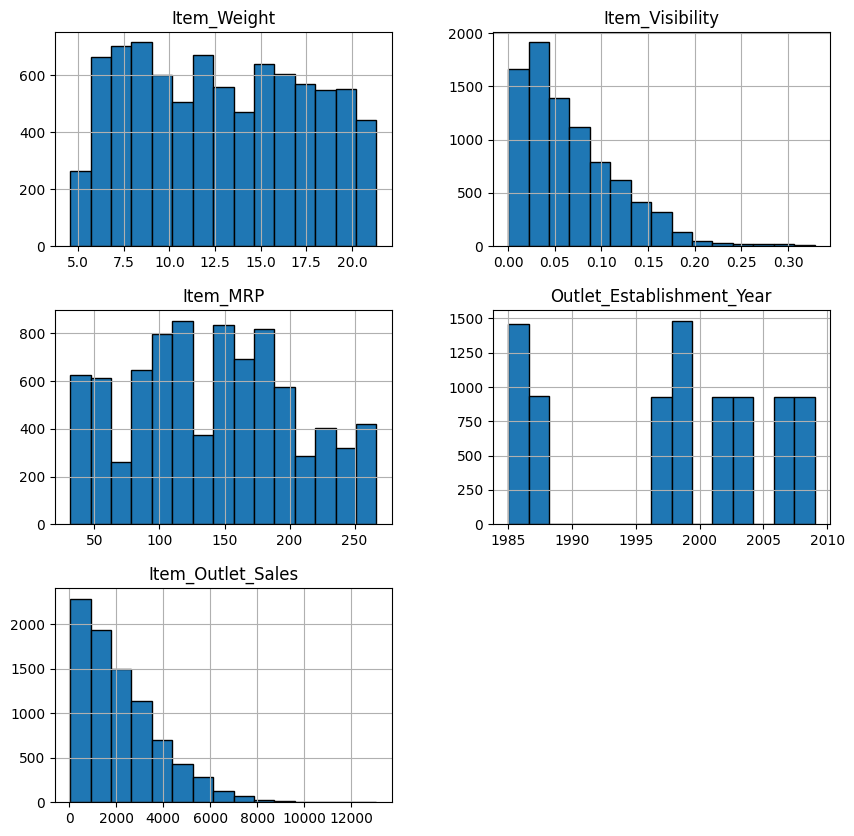

In [315]:
df.hist(figsize=(10,10), edgecolor = "black", bins= 15);
# "Outlet_Establisment_Year" es categórico, por eso el grafico no se ve continuo.



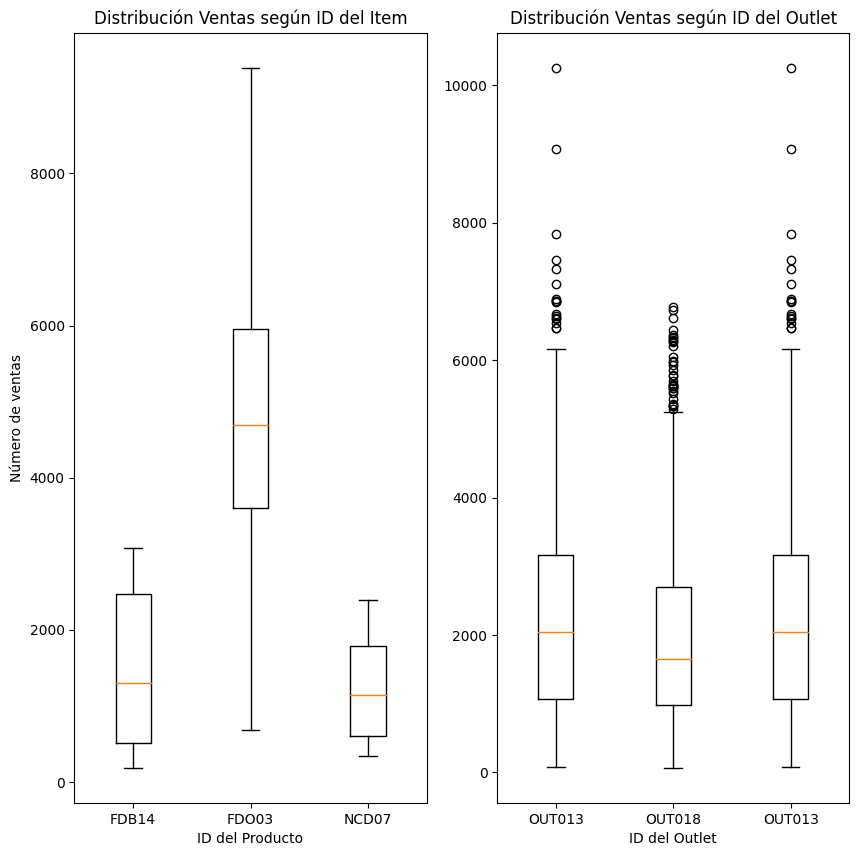

In [316]:
import random as rd
#Comparemos ventas a partir de 3 Items ID
n1 = rd.randint(0,len(df["Item_Identifier"].unique()))
val1 = df["Item_Identifier"].unique()[n1]

n2 = rd.randint(0,len(df["Item_Identifier"].unique()))
val2 = df["Item_Identifier"].unique()[n2]

n3 = rd.randint(0,len(df["Item_Identifier"].unique()))
val3 = df["Item_Identifier"].unique()[n3]

identificador_1 = df.loc[df['Item_Identifier']==val1,'Item_Outlet_Sales'].values
identificador_2 = df.loc[df['Item_Identifier']==val2,'Item_Outlet_Sales'].values
identificador_3 = df.loc[df['Item_Identifier']==val3,'Item_Outlet_Sales'].values

#Comparemos ventas a partir de 3 Outlets
n4 = rd.randint(0,len(df["Outlet_Identifier"].unique()))
val4 = df["Outlet_Identifier"].unique()[n4]

n5 = rd.randint(0,len(df["Outlet_Identifier"].unique()))
val5 = df["Outlet_Identifier"].unique()[n5]

n6 = rd.randint(0,len(df["Outlet_Identifier"].unique()))
val6 = df["Outlet_Identifier"].unique()[n6]

identificador_4 = df.loc[df['Outlet_Identifier']==val4,'Item_Outlet_Sales'].values
identificador_5 = df.loc[df['Outlet_Identifier']==val5,'Item_Outlet_Sales'].values
identificador_6 = df.loc[df['Outlet_Identifier']==val6,'Item_Outlet_Sales'].values


# Grafiquemos ambas comparaciones :)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axes[0].boxplot([identificador_1,identificador_2, identificador_3 ], labels=[val1, val2, val3]);
axes[0].set_xlabel("ID del Producto")
axes[0].set_ylabel("Número de ventas")
axes[0].set_title("Distribución Ventas según ID del Item")

axes[1].boxplot([identificador_4,identificador_5, identificador_6 ], labels=[val4, val5, val6]);
axes[1].set_xlabel("ID del Outlet")
axes[1].set_title("Distribución Ventas según ID del Outlet");


<Axes: >

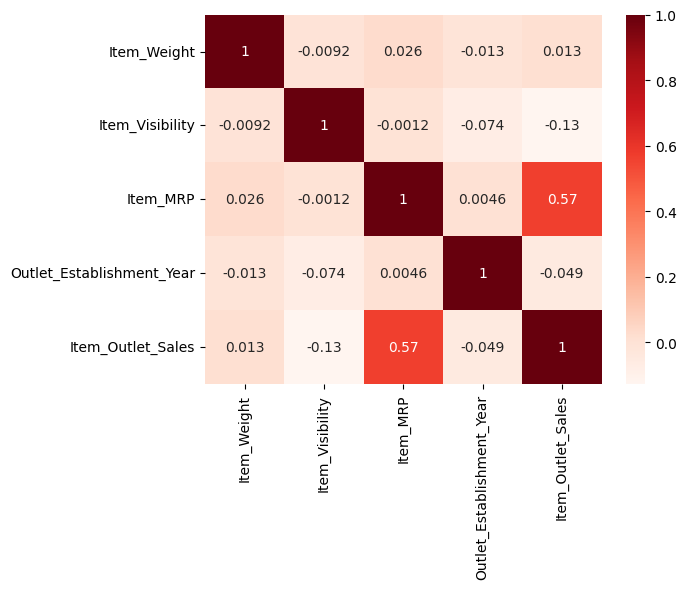

In [317]:
sns.heatmap(corr, cmap = 'Reds', annot=True)